In [1]:
import gdal
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define the years
year_range = [f'{i}_{i+2}' for i in range(1990,2018,3)]

# define the sample inverval
Sample_interval = 200

##### Calculate the length (pixel number) of each selected row/column

In [4]:
# calculate the length of the research area at each 
# selected row/column
base_img_path = f'./Data/NCP_Mask.tif'
base_img_gd   = gdal.Open(base_img_path)
base_img_arr   = base_img_gd.GetRasterBand(1).ReadAsArray()

# sum up the pixel number at each row/colum
sum_0 = base_img_arr.sum(1)
sum_1 = base_img_arr.sum(0)

# get the sample_idx, so we dont need to calculate each row/column
axis_0_idx = range(Sample_interval*10,
                   base_img_arr.shape[0] - Sample_interval*10,
                   Sample_interval)

axis_1_idx = range(Sample_interval*10,
                   base_img_arr.shape[1] - Sample_interval*10,
                   Sample_interval)

# reduce the size by sample data by an interval
base_0 = sum_0[axis_0_idx]
base_1 = sum_1[axis_1_idx]

# release memorry
del(base_img_gd)
del(base_img_arr)

##### calculate the built-up pixel at each selected row/column

In [4]:
Img_Arr_axis_0 = {}
Img_Arr_axis_1 = {}

for i,year in enumerate(year_range):
    
    # read the raster and conver it to an np.array
    img_path = f'./Data/forward_backward_Window_3_It_9_{year}.tif'
    img_gd   = gdal.Open(img_path)
    img_arr  = img_gd.GetRasterBand(1).ReadAsArray()
    
    # sum up the pixel number at each row/colum
    sum_0 = img_arr.sum(1)
    sum_1 = img_arr.sum(0)
    
    # reduce the size by sample data by an interval
    sum_axis_0 = sum_0[axis_0_idx]
    sum_axis_1 = sum_1[axis_1_idx]

    
    # release the memory
    del(img_arr)
    del(img_gd)
    
    # add the reduced arr to list
    Img_Arr_axis_0[(year,'Built')] = sum_axis_0
    Img_Arr_axis_1[(year,'Built')] = sum_axis_1
    
    # add the length of base line into dictionary
    Img_Arr_axis_0[(year,'Base')] = base_0
    Img_Arr_axis_1[(year,'Base')] = base_1
    
    # print the process
    print(f'Raster of {year} to array successed!')
    

Raster of 1990_1992 to array successed!
Raster of 1993_1995 to array successed!
Raster of 1996_1998 to array successed!
Raster of 1999_2001 to array successed!
Raster of 2002_2004 to array successed!
Raster of 2005_2007 to array successed!
Raster of 2008_2010 to array successed!
Raster of 2011_2013 to array successed!
Raster of 2014_2016 to array successed!
Raster of 2017_2019 to array successed!


##### formatting the result

In [5]:
# # storge the sun of pixel number to df
# Axix_0_df = pd.DataFrame(Img_Arr_axis_0)
# Axix_0_df.index = axis_0_idx

# # unstack the df to get a long format
# Axix_0_long = Axix_0_df.stack(0).reset_index()
# Axix_0_long.columns = ['idx','Year','Base','Built']

# # calculate the built-up percent at each selected rows
# Axix_0_long['Percent']  = Axix_0_long['Built']/Axix_0_long['Base']

# # add the latitude
# Lat_top = 42.6149092688
# Lat_bot = 29.3959303684
# Lat = np.linspace(Lat_top,Lat_bot,len(Axix_0_long))
# Axix_0_long['Lat']  = Lat

# # save the disk
# Axix_0_long.to_csv('./Result/Axix_0_long.csv',index=False)

# read the csv
Axix_0_long = pd.read_csv('./Result/Axix_0_long.csv')
Axix_0_long['Year'] = Axix_0_long['Year'].astype('category')

In [6]:
# # storge the sun of pixel number to df
# Axix_1_df = pd.DataFrame(Img_Arr_axis_1)
# Axix_1_df.index = axis_1_idx

# # unstack the df to get a long format
# Axix_1_long = Axix_1_df.stack(0).reset_index()
# Axix_1_long.columns = ['idx','Year','Base','Built']

# # calculate the built-up percent at each selected rows
# Axix_1_long['Percent']  = Axix_1_long['Built']/Axix_1_long['Base']

# # add the longtitue
# Lon_left  = 110.353990235
# Lon_right = 122.705466066
# Lon = np.linspace(Lon_left,Lon_right,len(Axix_1_long))
# Axix_1_long['Lon']  = Lon

# # save the disk
# Axix_1_long.to_csv('./Result/Axix_1_long.csv',index=False)

# read the csv
Axix_1_long = pd.read_csv('./Result/Axix_1_long.csv')
Axix_1_long['Year'] = Axix_1_long['Year'].astype('category')

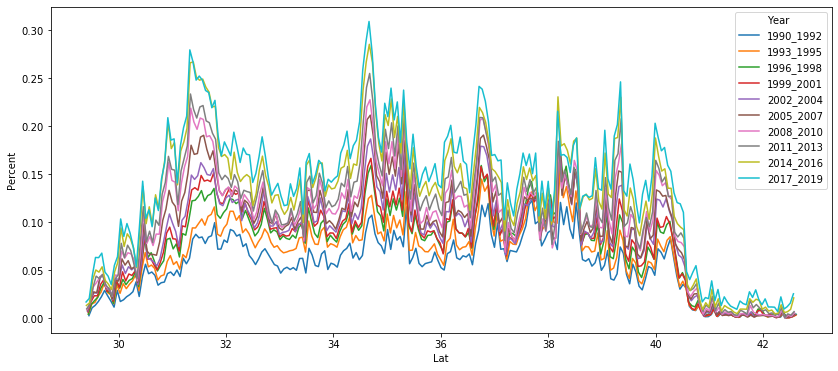

In [7]:
plt.figure(figsize=(14,6))
sns.lineplot(data = Axix_0_long,x='Lat',y='Percent',hue='Year')

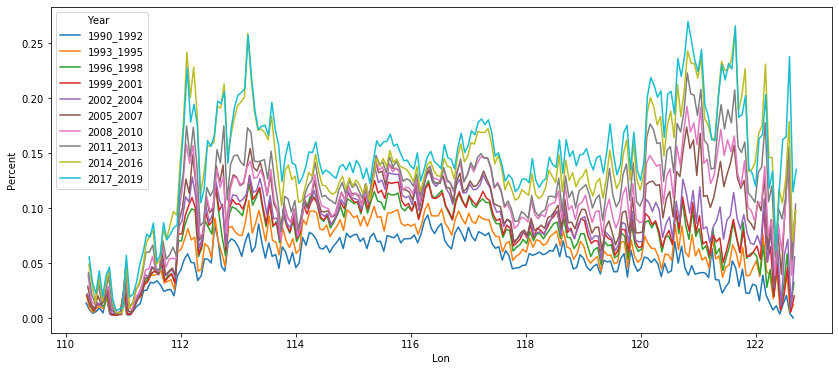

In [8]:
plt.figure(figsize=(14,6))
sns.lineplot(data = Axix_1_long,x='Lon',y='Percent',hue='Year')